# Analyzing data in files using basic Python and the Python CSV module

For this homework, unless told otherwise, **please don't** use Python modules such as Pandas --- the goal is to practice using basic Python and data structures.  We will start using these other modules later in the course.

## 1.  Computing and displaying the frequency of words and letters in text

This question is intended for your practice using dictionaries and learning about `collections.defaultdict`.

We will again use "allswell.txt" to provide the data.   


### 1.a Write a function that 

1. takes a string as an argument, 
2. replaces with a space any character that is not a lowercase letter, and 
3. returns a new string

Test it on the string 
```
'once more unto the breach, dear friends, once more;'
``` 

It should return 

``` 
'once more unto the breach  dear friends  once more '
```

In [5]:
def replace_space(character):
  sentance = ''
  for ch in character:
    sentance += ch if ch.islower() else ' '
  return sentance

string = 'once more unto the breach, dear friends, once more;'
print(replace_space(string))


once more unto the breach  dear friends  once more 


### 1.b Count the number of times each word and letter character appears in `allswell.txt` 


We did something like this in class, but now we want to be more intelligent about how we distinguish words and handle punctuation and mixed case.
* when you read a line of text immediately convert it to lowercase so that 
  1. you don't end up with words/letters that differ just by case, and
  2. when comparing characters you don't have to worry about their case
* before splitting into words use the function you just wrote to remove characaters that are not letters or space 

Print out the number of distinct words and characters.

[Aside: You could try to use the `collections.defaultdict` but using the usual python dictionary is OK too.]

In [26]:
from collections import defaultdict
# Step 1: open the file and set up a dictionary
f = open('allswell.txt', 'r')
d = defaultdict(int)
dc = defaultdict(int)
# Step 2: convert all letters into lowercase and store in dictionary
for line in f:
    word_line = ''
    characters_line = ''
    for ch in line:
        if ch.isalpha():
            word_line += ch.lower()
            characters_line += ch.lower()
        elif ch == ' ':
            word_line += ' '
    line = word_line.split()
    for word in line:
        d[word] += 1
    for ch in characters_line:
        dc[ch] += 1
# Step 3: print
print('------------ Words')
for key, value in d.items():
    print(key, value)
print('-------------Characters')
for key, value in dc.items():
    print(key, value)


------------ Words
scene 1
i 35
rousillon 2
the 56
counts 1
palace 1
enter 3
bertram 10
countess 10
of 38
helena 22
and 52
lafeu 13
all 7
in 35
black 1
delivering 1
my 19
son 1
from 4
me 7
bury 1
a 44
second 1
husband 3
going 1
madam 7
weep 1
oer 1
fathers 1
death 3
anew 1
but 12
must 8
attend 2
his 24
majestys 2
command 1
to 29
whom 1
am 3
now 4
ward 1
evermore 1
subjection 1
you 29
shall 7
find 1
king 3
sir 3
father 5
he 18
that 24
so 15
generally 1
is 27
at 2
times 2
good 6
necessity 1
hold 2
virtue 3
whose 3
worthiness 1
would 6
stir 1
it 26
up 7
where 3
wanted 1
rather 4
than 5
lack 2
there 8
such 1
abundance 1
what 10
hope 3
amendment 1
hath 3
abandoned 1
physicians 1
under 8
practises 1
persecuted 1
time 3
with 14
finds 1
no 8
other 1
advantage 2
process 1
only 2
losing 1
by 4
this 3
young 1
gentlewoman 2
had 4
fathero 1
how 6
sad 1
passage 1
tiswhose 1
skill 1
was 12
almost 1
as 5
great 4
honesty 2
stretched 1
far 1
have 10
made 4
nature 5
immortal 1
should 3
play 1
for 14
work

### 1.c Make a list of the word counts (i.e., how many times each word appears), sort it in decreasing order and plot the data using a bar chart

This is an example of a long-tailed distribution - there are many words that are individually infrequently used, but collectively they are responsible for a lot of the words used.

In [38]:
word_counts = d
count_to_words = defaultdict(list)
for word in word_counts:
    counts = word_counts[word]
    count_to_words[counts].append(word)

for key, value in sorted(count_to_words.items(), reverse=True):
    print(key, value)
    

56 ['the']
52 ['and']
44 ['a']
38 ['of']
35 ['i', 'in']
29 ['to', 'you']
27 ['is']
26 ['it']
24 ['his', 'that']
23 ['be']
22 ['helena']
20 ['parolles']
19 ['my']
18 ['he']
17 ['him', 'her', 'virginity']
15 ['so', 'your']
14 ['with', 'for']
13 ['lafeu']
12 ['but', 'was', 'not']
10 ['bertram', 'countess', 'what', 'have', 'which', 'thee', 'will']
9 ['think', 'tis', 'thy', 'like']
8 ['must', 'there', 'under', 'no', 'love', 'when']
7 ['all', 'me', 'madam', 'shall', 'up', 'we', 'our']
6 ['good', 'would', 'how', 'lord', 'do', 'farewell', 'one', 't']
5 ['father', 'than', 'as', 'nature', 'were', 'makes', 'are', 'enemy', 'thou', 'on', 'cannot', 'away', 'itself', 'yet']
4 ['from', 'now', 'rather', 'by', 'had', 'great', 'made', 'living', 'man', 'if', 'against', 'an', 'too', 'can', 'never', 'more', 'none', 'may', 'down', 'exit', 'much', 'see', 'out', 'us', 'might', 'marry', 'well', 'mars']
3 ['enter', 'husband', 'death', 'am', 'king', 'sir', 'virtue', 'whose', 'where', 'hope', 'hath', 'time', 'this

For those of you wanting a slightly harder problem, print out the words in order of decreasing frequency. If you don't want to do it, then read my solutions and insert comments on how they work.

I give two solutions below assuming the dictionary you made containing the word counts is called `word_counts`, but there are several ways of doing it.  The second approach is rather advanced - look in the documentation for `sorted` (https://docs.python.org/3/library/functions.html#sorted) to see if you can understand it - I don't expect everyone should at this point.

In [39]:
import collections
count_to_words = collections.defaultdict(list)
for word in word_counts:
    count_to_words[word_counts[word]].append(word)

for count in sorted(count_to_words,reverse=True):
    print("% 4d" % count, count_to_words[count])

# Uncomment this to run the second solution
# for word in sorted(word_counts, key=word_counts.__getitem__, reverse=True):
#    print("%10s %d" % (word,word_counts[word]))

  56 ['the']
  52 ['and']
  44 ['a']
  38 ['of']
  35 ['i', 'in']
  29 ['to', 'you']
  27 ['is']
  26 ['it']
  24 ['his', 'that']
  23 ['be']
  22 ['helena']
  20 ['parolles']
  19 ['my']
  18 ['he']
  17 ['him', 'her', 'virginity']
  15 ['so', 'your']
  14 ['with', 'for']
  13 ['lafeu']
  12 ['but', 'was', 'not']
  10 ['bertram', 'countess', 'what', 'have', 'which', 'thee', 'will']
   9 ['think', 'tis', 'thy', 'like']
   8 ['must', 'there', 'under', 'no', 'love', 'when']
   7 ['all', 'me', 'madam', 'shall', 'up', 'we', 'our']
   6 ['good', 'would', 'how', 'lord', 'do', 'farewell', 'one', 't']
   5 ['father', 'than', 'as', 'nature', 'were', 'makes', 'are', 'enemy', 'thou', 'on', 'cannot', 'away', 'itself', 'yet']
   4 ['from', 'now', 'rather', 'by', 'had', 'great', 'made', 'living', 'man', 'if', 'against', 'an', 'too', 'can', 'never', 'more', 'none', 'may', 'down', 'exit', 'much', 'see', 'out', 'us', 'might', 'marry', 'well', 'mars']
   3 ['enter', 'husband', 'death', 'am', 'king', 'si

## 2.  Using Python to analyze a CSV file

Again, **please do this section with basic Python instead of an existing Python module.**

The data we are using is (an older version) taken from https://catalog.data.gov/dataset/demographic-statistics-by-zip-code.

A CSV (comma-separated values) file is a table written out with one row per line.  Within each line, values are separated by commas.  Often the first row (and perhaps the first column) are interpreted as headers or labels.

Download from the Blackboard assignment page the file `'Demographic_Statistics_By_Zip_Code.csv'` --- have a look at it using either a text editor (or if you prefer you could try importing it into a spread sheet program like Excel).

The headings for each column of data in the file (i.e., the first line in the file) are

```
JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,COUNT HISPANIC LATINO,PERCENT HISPANIC LATINO,COUNT AMERICAN INDIAN,PERCENT AMERICAN INDIAN,COUNT ASIAN NON HISPANIC,PERCENT ASIAN NON HISPANIC,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN,COUNT ETHNICITY TOTAL,PERCENT ETHNICITY TOTAL,COUNT PERMANENT RESIDENT ALIEN,PERCENT PERMANENT RESIDENT ALIEN,COUNT US CITIZEN,PERCENT US CITIZEN,COUNT OTHER CITIZEN STATUS,PERCENT OTHER CITIZEN STATUS,COUNT CITIZEN STATUS UNKNOWN,PERCENT CITIZEN STATUS UNKNOWN,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
```

### 2.a.  Write a function to extract the column of data from the file corresponding to a given heading

E.g., given `'JURISDICTION NAME`` return a list containing all of the zip codes

* Raise a `ValueError` exception if the heading is not found

* Since in this file all of the data (except for headings) are numbers, please return a list of floats (not strings).

Test it on `'JURISDICTION NAME'` and `'COUNT PARTICIPANTS'` as well as on a heading that does not exist.


In [68]:
def extract_data(column_name):
    f = open('Demographic_Statistics_By_Zip_Code.csv', 'r')
    first = True
    columns = {}
    for line in f:
        index = 0
        line = line.strip().split(',')
        if first:
            for column in line:
                columns[column] = []
            first = False
        else:
            for column in columns:
                columns[column].append(float(line[index]))
                index += 1
    try:
        return columns[column_name]
    except KeyError:
        print('Heading is not found')
    
print(extract_data('COUNT PARTICIPANTS'))

[44.0, 35.0, 1.0, 0.0, 2.0, 6.0, 1.0, 2.0, 0.0, 3.0, 0.0, 8.0, 0.0, 17.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 7.0, 4.0, 27.0, 0.0, 7.0, 0.0, 20.0, 0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 2.0, 0.0, 16.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 41.0, 17.0, 14.0, 18.0, 27.0, 5.0, 0.0, 52.0, 7.0, 27.0, 49.0, 3.0, 59.0, 15.0, 21.0, 65.0, 106.0, 81.0, 10.0, 43.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 15.0, 37.0, 5.0, 13.0, 0.0, 0.0, 0.0, 36.0, 34.0, 10.0, 38.0, 10.0, 0.0, 0.0, 0.0, 111.0, 214.0, 8.0, 0.0, 0.0, 109.0, 93.0, 52.0, 10.0, 0.0, 52.0, 248.0, 0.0, 0.0, 14.0, 59.0, 50.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 2.0, 3.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 4.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0,

### 2.b.  Now you are armed to explore the data!

Which zip code has the most males?

Which zip code has the most permanent resident aliens?

What are the max, min, mean, median, mode and variance of the `'COUNT AMERICAN INDIAN'`? Hint: remember the statistics module?

In [76]:
from statistics import *
males = extract_data('COUNT MALE')
zipcode = extract_data('JURISDICTION NAME')
print('zip code has the most males:', zipcode[males.index(max(males))])
permanent = extract_data('COUNT PERMANENT RESIDENT ALIEN')
print('zip code has the most permanent resident aliens:', zipcode[permanent.index(max(permanent))])
indian = extract_data('COUNT AMERICAN INDIAN')
print(type(indian[0]))
print('max:', max(indian))
print('min:', min(indian))
print('mean:', mean(indian))
print('median:', median(indian))
print('mode:', mode(indian))
print('variance:', variance(indian))

zip code has the most males: 12789.0
zip code has the most permanent resident aliens: 10467.0
<class 'float'>
max: 2.0
min: 0.0
mean: 0.0211864406779661
median: 0.0
mode: 0.0
variance: 0.029336458708979447


### 2.c  Making scatter plots

We can visually explore (non-quantitatively) correlations between two quantities by making a scatter plot which takes two vector of data (e,g, x and y) plots each pair of values as a point (don't connect the points with lines).

Let's look to see what's correlated with the number of people on public assistance.

First, we might expect that the number of people on assistance would increase with the total number of people.  So, to test this expectation, please make a scatter plot of `'COUNT RECEIVES PUBLIC ASSISTANCE'` (y-axis) against `'COUNT PARTICIPANTS'`.

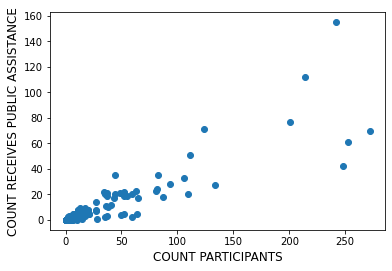

In [78]:
import matplotlib.pyplot as plt
x_axis = extract_data('COUNT PARTICIPANTS')
y_axis = extract_data('COUNT RECEIVES PUBLIC ASSISTANCE')
plt.scatter(x_axis, y_axis)
plt.xlabel('COUNT PARTICIPANTS', fontsize=12)
plt.ylabel('COUNT RECEIVES PUBLIC ASSISTANCE', fontsize=12)
plt.show()

This visually supports the expected correlation.

Make a figure with 4 subplots showing the correlation of 'COUNT RECEIVES PUBLIC ASSISTANCE' with each of 'PERCENT HISPANIC LATINO', 'PERCENT BLACK NON HISPANIC', 'PERCENT US CITIZEN' and 'PERCENT ASIAN NON HISPANIC'.  Don't forget to label the axes, make sure the plots don't overlap (hint: read about tight layout), and that the text is readable (hint: font size and perhaps a strategic new line).

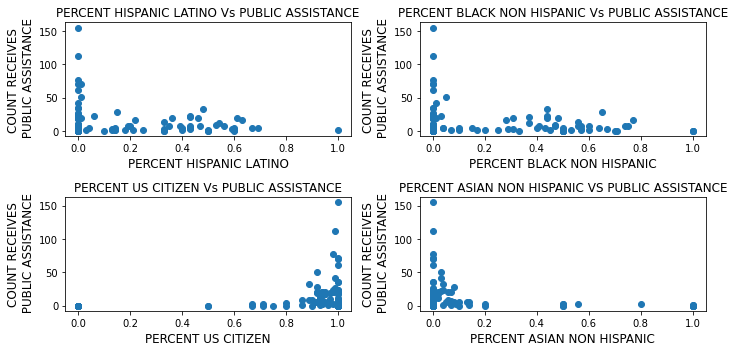

In [93]:
import numpy as np
def subplot(ax, x, y, fontsize=12):           
    ax.scatter(np.array(extract_data(x)), np.array(extract_data(y))) 
    ax.set_xlabel(x, fontsize=fontsize)
    ax.set_ylabel('COUNT RECEIVES\n PUBLIC ASSISTANCE', fontsize=fontsize)   
    ax.set_title('Title', fontsize=fontsize)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) #Four different plots
subplot(ax1, 'PERCENT HISPANIC LATINO', 'COUNT RECEIVES PUBLIC ASSISTANCE')
subplot(ax2, 'PERCENT BLACK NON HISPANIC', 'COUNT RECEIVES PUBLIC ASSISTANCE')
subplot(ax3, 'PERCENT US CITIZEN', 'COUNT RECEIVES PUBLIC ASSISTANCE')
subplot(ax4, 'PERCENT ASIAN NON HISPANIC', 'COUNT RECEIVES PUBLIC ASSISTANCE')
ax1.title.set_text('PERCENT HISPANIC LATINO Vs PUBLIC ASSISTANCE')
ax2.title.set_text('PERCENT BLACK NON HISPANIC Vs PUBLIC ASSISTANCE')
ax3.title.set_text('PERCENT US CITIZEN Vs PUBLIC ASSISTANCE')
ax4.title.set_text('PERCENT ASIAN NON HISPANIC VS PUBLIC ASSISTANCE')
plt.tight_layout()
plt.show()

## 3.  Using Python's CSV module to analyze a CSV file

Please use the Python CSV module to complete this section.

* https://docs.python.org/3/library/csv.html

### 3.a.  Use Python's CSV module to print out each record in the data file, numbering each line

E.g., the first few lines of your output should look something like
```
   0 ['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE', etc.]
   1 ['10001', '44', '22', '0.5', '22', '0.5', '0', '0', '44', etc.]
   2 ['10002', '35', '19', '0.54', '16', '0.46', '0', '0', etc.]
   etc.
```


In [95]:
import csv
with open('Demographic_Statistics_By_Zip_Code.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for idx, row in enumerate(spamreader):
        print(idx, row)

0 ['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE', 'PERCENT FEMALE', 'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN', 'PERCENT GENDER UNKNOWN', 'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL', 'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO', 'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC', 'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN', 'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL', 'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS', 'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN', 'PERCENT CITIZEN STATUS UNKNOWN', 'COUNT CITIZEN STATUS TOTAL', 'PERCENT CITIZEN STATUS TOTAL', 

From the above, you should now see how to use the CSV module to process a CSV file.  Each line immediately becomes a list that you can easily process.  As the documentation indicates, the CSV module can handle many/most of the weird different formats called CSV.  Thus, you should prefer using it to writing your own code (as we did above for Python practice).

### 3.b.  Let's write a CSV file using the Python CSV module

Write out a new CSV file called `'mydata.csv'` containing just the columns 'JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE', 'COUNT MALE', and 'COUNT RECEIVES PUBLIC ASSISTANCE', and only for the zip codes 10024, 10025, 10026, and 10027.

* Note: you should close your file once you are finished writing so that all of the output is flushed to disk.

In [102]:
h1='JURISDICTION NAME'
h2='COUNT PARTICIPANTS'
h3='COUNT FEMALE'
h4='COUNT MALE'
h5='COUNT RECEIVES PUBLIC ASSISTANCE'
h1_id=-1
h2_id=-1
h3_id=-1
h4_id=-1
h5_id=-1

csvList = []
with open('Demographic_Statistics_By_Zip_Code.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for idx, row in enumerate(reader):
        if idx == 0:
            h1_id = row.index(h1) # column index
            h2_id = row.index(h2)
            h3_id = row.index(h3)
            h4_id = row.index(h4)
            h5_id = row.index(h5)
        else:
            if row[h1_id] in ['10024', '10025', '10026', '10027']:
                csvList.append([row[h1_id], row[h2_id], row[h3_id], row[h4_id], row[h5_id]])
                
with open('mydata.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow([h1, h2, h3, h4, h5]) # column title
    for row in csvList:
        writer.writerow(row)
csvfile.close()
print(csvList)

[['10024', '4', '4', '0', '1'], ['10025', '27', '17', '10', '8'], ['10026', '0', '0', '0', '0'], ['10027', '7', '4', '3', '1']]


### 3.c.  Print the new CSV file you created just as you did the full file in 3.a



In [104]:
import csv
with open('mydata.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for idx, row in enumerate(reader):
        print(idx, row)

0 ['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE', 'COUNT MALE', 'COUNT RECEIVES PUBLIC ASSISTANCE']
1 ['10024', '4', '4', '0', '1']
2 ['10025', '27', '17', '10', '8']
3 ['10026', '0', '0', '0', '0']
4 ['10027', '7', '4', '3', '1']
